In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import time
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic('matplotlib inline')
pd.set_option('display.max_columns',500)

plt.style.use('ggplot')

In [226]:
cd candidates_toolkit/data/


[Errno 2] No such file or directory: 'candidates_toolkit/data/'
/home/marc/Dropbox/BCG Datathon/candidates_toolkit/data


In [227]:
train_df = pd.read_csv('ml_case_training_data_v2.csv')
test_df = pd.read_csv('ml_case_test_data_v2.csv')
historical_df = pd.read_csv('ml_case_training_hist_data.csv')
output_df=pd.read_csv('ml_case_training_output.csv')
df=pd.read_csv('full_dataset.csv', sep=';')

In [228]:
import pickle
with open('catboost.pickle', 'rb') as handle:
    catboost = pickle.load(handle)

In [229]:
catboost

{'cons_12m': 4.837751519665986,
 'cons_12m_w': 1.916817039037431,
 'cons_gas_12m': 2.417052496394094,
 'cons_last_month': 4.281000522588549,
 'date_diff_activ': 3.4281785789192227,
 'date_diff_end': 5.8618357608492015,
 'forecast_cons_year': 0.6318353916796445,
 'imp_cons_w': 0.36286027167465323,
 'increased_p1_fix': 0.0,
 'increased_p1_var': 0.03312959259247544,
 'increased_p2_fix': 0.12120838632206793,
 'increased_p2_var': 0.0,
 'increased_p3_fix': 0.0,
 'increased_p3_var': 0.0,
 'increment_p1_fix': 1.0359031330043134,
 'increment_p1_var': 2.1381895385910146,
 'increment_p2_fix': 0.4279586968137538,
 'increment_p2_var': 1.5037949269999529,
 'increment_p3_fix': 1.6379597960745012,
 'increment_p3_var': 1.2807127949796575,
 'isic_1l_te': 2.172786163030775,
 'isic_2l': 1.158605183246563,
 'margin_gross_pow_ele_w': 5.971057852172443,
 'margin_net_pow_ele_w': 6.851585426350909,
 'nb_prod_act': 0.1804142685265765,
 'net_margin': 1.9418620963736293,
 'net_margin_w': 1.1203313063067633,
 'num

In [230]:
def get_rows(catboost):
    variables=[]
    score=[]
    for key in catboost.keys():
      #print(key)
      #print(catboost[key])
      variables.append(key)
      score.append(catboost[key])
      score, variables =  (list(t) for t in zip(*sorted(zip(score, variables))))
      score=score[::-1]
      variables=variables[::-1]

    return variables, score

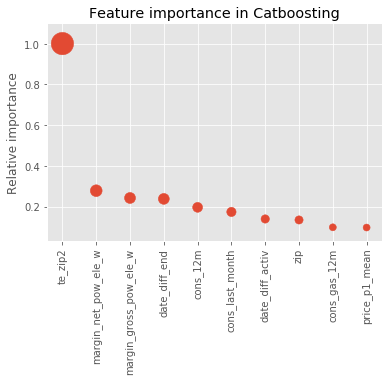

In [231]:
catboost_variables,catboost_score=get_rows(catboost)

N=10

suma=0
for i in range(len(catboost_score)):
    suma += catboost_score[i]

    
catboost_score=catboost_score/np.max(catboost_score)   
#catboost_score=catboost_score/suma

catboost_score=catboost_score[0:N]
catboost_variables=catboost_variables[0:N]


plt.scatter(catboost_variables,catboost_score, s=catboost_score*500)
plt.xticks(rotation=90);
plt.title(r'Feature importance in Catboosting' )
plt.ylabel(r'Relative importance')
plt.savefig('catboost.eps')
plt.savefig('catboost.png')

In [232]:
import pickle
with open('lasso.pickle', 'rb') as handle:
    lasso = pickle.load(handle)

In [233]:
lasso

{'cons_12m': 1.0403589559527628e-08,
 'cons_12m_w': -3.0217742180694366e-08,
 'cons_gas_12m': -3.708598613890829e-08,
 'cons_last_month': -4.9070320654801285e-09,
 'date_diff_activ': -5.275329280525109e-05,
 'date_diff_end': -2.6749503663171426e-05,
 'forecast_cons_year': -1.1437606630295369e-07,
 'imp_cons_w': -1.717979773494704e-05,
 'increased_p1_fix': 0.0035666424328112713,
 'increased_p1_var': 0.015111917148912805,
 'increased_p2_fix': -0.026038901454511678,
 'increased_p2_var': 0.007499790910972956,
 'increased_p3_var': 0.0051613017950061235,
 'increment_p1_fix': -0.0010838674297903614,
 'increment_p1_var': -1.9134486738810014e-05,
 'increment_p2_fix': 0.004670890782236132,
 'increment_p2_var': -3.408145373537418e-05,
 'increment_p3_fix': -0.008868055968022544,
 'increment_p3_var': 5.747330694514925e-06,
 'isic_1l_te': 0.5075042899653659,
 'isic_2l': 0.00014034500369316784,
 'margin_gross_pow_ele_w': 0.0011560290061335473,
 'margin_net_pow_ele_w': 0.0007147195521945859,
 'nb_prod

In [234]:


lasso_variables,lasso_score=get_rows(lasso)

lasso_score_aux=np.abs(lasso_score)
lasso_score, lasso_variables =  (list(t) for t in zip(*sorted(zip(lasso_score_aux, lasso_variables))))

lasso_score=lasso_score[::-1]
lasso_variables=lasso_variables[::-1]

lasso_score


[0.9819493287599663,
 0.5075042899653659,
 0.360896974465596,
 0.026038901454511678,
 0.015111917148912805,
 0.009259353662628273,
 0.008868055968022544,
 0.00870494622602955,
 0.007957704772806051,
 0.007499790910972956,
 0.007315760534633914,
 0.005796106112867282,
 0.0051613017950061235,
 0.004962082807263648,
 0.004824563706765445,
 0.004670890782236132,
 0.0043795074596911865,
 0.0036988289735029635,
 0.0035666424328112713,
 0.003371714828183461,
 0.0031819069977877734,
 0.0011560290061335473,
 0.0010838674297903614,
 0.0007147195521945859,
 0.0007063000191398938,
 0.0004743822605476623,
 0.0002468214292380193,
 0.00022818428422244396,
 0.00018467938543174746,
 0.00015452289220075125,
 0.00014976338620650704,
 0.00014034500369316784,
 5.275329280525109e-05,
 4.6437680618440476e-05,
 3.789943383704429e-05,
 3.408145373537418e-05,
 2.6749503663171426e-05,
 2.606950982160716e-05,
 2.2187968164627342e-05,
 2.0931009526960875e-05,
 1.9134486738810014e-05,
 1.717979773494704e-05,
 1.073

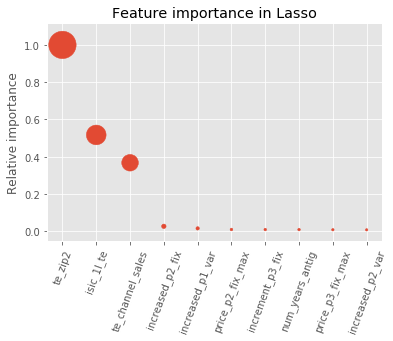

In [235]:

N=10

suma=0
for i in range(len(lasso_score)):
    suma += lasso_score[i]

lasso_score=lasso_score/np.max(lasso_score)

lasso_score=lasso_score[0:N]
lasso_variables=lasso_variables[0:N]

plt.scatter(lasso_variables,lasso_score, s=lasso_score*750)
plt.xticks(rotation=70);
plt.title(r'Feature importance in Lasso' )
plt.ylabel(r'Relative importance')

plt.savefig('lasso.eps')
plt.savefig('lasso.png')

In [236]:
df=df.drop('campaign_disc_ele',1)


In [237]:

columns=df.columns
columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_first_activ', 'date_modif_prod',
       'date_renewal', 'forecast_base_bill_ele', 'forecast_base_bill_year',
       'forecast_bill_12m', 'forecast_cons', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'isic_1l',
       'isic_2l', 'zip', 'churn', 'Churn_probability'],
      dtype='object')

In [238]:
new_df=pd.DataFrame(columns=['margin_gross_pow_ele','margin_net_pow_ele','num_years_antig','churn'])
new_df['margin_gross_pow_ele']=df['margin_gross_pow_ele']
new_df['margin_net_pow_ele']=df['margin_net_pow_ele']
new_df['num_years_antig']=df['num_years_antig']
new_df['churn']=df['churn']

#new_df

Text(0.5, 1.0, 'Main correlations at first insights')

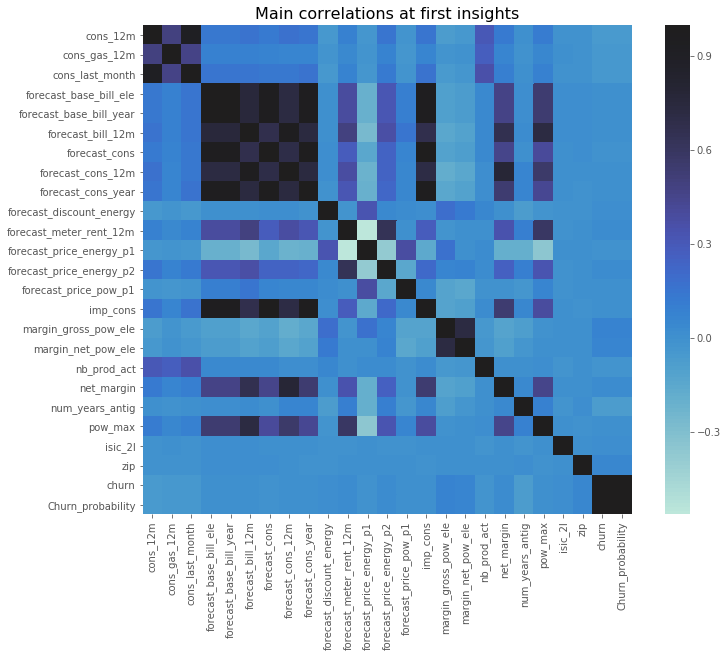

In [239]:

corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, center=True)
plt.title(r'Main correlations at first insights',size=16)


In [240]:
corrmat['churn'].sort_values(ascending=False)

Churn_probability           1.000000
churn                       1.000000
margin_gross_pow_ele        0.080302
margin_net_pow_ele          0.063255
zip                         0.049957
forecast_meter_rent_12m     0.030122
net_margin                  0.029845
forecast_price_energy_p2    0.025274
isic_2l                     0.018241
forecast_discount_energy    0.012604
pow_max                     0.009836
forecast_bill_12m           0.008204
forecast_cons_12m           0.007897
forecast_price_pow_p1       0.004126
imp_cons                    0.003762
forecast_cons_year          0.003091
forecast_base_bill_year     0.001614
forecast_base_bill_ele      0.001614
forecast_price_energy_p1   -0.003604
forecast_cons              -0.004164
nb_prod_act                -0.022343
cons_gas_12m               -0.040707
cons_last_month            -0.046903
cons_12m                   -0.051862
num_years_antig            -0.071515
Name: churn, dtype: float64